<center><img src="./images/logo_fmkn.png" width=300 style="display: inline-block;"></center> 

## Машинное обучение
### Семинар 2. Матрично-векторное дифференцирование, линейная регрессия

<br />
<br />
9 сентября 2021

 * на лекции мы осознаем важность градиентного спуска
 * ещё умение считать производные (градиенты) пригодится для понимания и написания нейронных сетей (обратное распространение ошибки)

<center><img src="./images/feed-forward-and-back-prop.png" width=500 style="display: inline-block;"></center> 


*Определения*
 * При отображении вектора в число $f(x): \mathbb{R}^n \to \mathbb{R}$
 
 $\nabla_x f(x) =
        \bigg[
            \frac{\partial f}{\partial x_1},
            \dots,
            \frac{\partial f}{\partial x_n}
        \bigg]^T
$
 * При отображении матрицы в число $f(A): \mathbb{R}^{n \times m} \to \mathbb{R}$

$ \nabla_A f(A) =
        \bigg(
            \frac{\partial f}{\partial a_{ij}}
        \bigg)_{i,j=1}^{n,m}
$

#### Задача 1

Пусть $a \in \mathbb{R}^n$ — вектор параметров, а $x \in \mathbb{R}^n$ — вектор переменных. Найдите производную их скалярного произведения по вектору переменных $\nabla_x a^Tx$.

#### Решение

$ \frac{\partial}{\partial x_i} a^Tx = \frac{\partial}{\partial x_i}\sum\limits_j a_jx_j = a_i$, поэтому $\nabla_x a^Tx = a$

Заметим, что $a^Tx$ — это число, поэтому $a^Tx = x^Ta$, следовательно, $\nabla_x x^Ta = a$


#### Задача 2

Пусть теперь $A \in \mathbb{R}^{n\times n}$. Необходимо найти $\nabla_x x^TAx$.

#### Решение

$ \frac{\partial}{\partial x_i} x^TAx = \frac{\partial}{\partial x_i}\sum\limits_j x_j (Ax)_j = \frac{\partial}{\partial x_i}\sum\limits_j x_j \bigg(\sum\limits_k a_{jk}x_k\bigg) = \\
= \frac{\partial}{\partial x_i}\sum\limits_{j,k} a_{jk} x_j x_k = \\
 = \sum\limits_{j \neq i} a_{ji} x_j + \sum\limits_{k \neq i} a_{ik} x_k + 2a_{ii}x_i = \sum\limits_{j} a_{ji} x_j + \sum\limits_{k} a_{ik} x_k = \sum\limits_{j} (a_{ji} + a_{ij}) x_j$
 
 Поэтому $\nabla_x x^TAx = (A + A^T)x$

#### Задача 3

Пусть $A \in \mathbb{R}^{n\times n}$. Необходимо найти $\nabla_A \det A$.

#### Решение

Воспользуемся следствием теоремы Лапласа о разложении определителя по строке:

$\frac{\partial}{\partial a_{ij}} \det A = \frac{\partial}{\partial a_{ij}}\bigg[\sum\limits_k (-1)^{i+k}a_{ik}M_{ik}\bigg] = (-1)^{i+j}M_{ij}, \; $
где $M_{ik}$ — дополнительный минор матрицы $A$. 

Также вспомним формулу для элементов обратной матрицы
$(A^{-1})_{ij} = \frac{1}{\det A}(-1)^{i+j}M_{ji}.$
    
Подставляя выражение для дополнительного минора, получаем ответ $\nabla_A \det A = (\det A) A^{-T}$.

#### Задача 4

Пусть $A \in \mathbb{R}^{n \times n},\ B \in \mathbb{R}^{n \times n}$. Необходимо найти $\nabla_A \text{tr}(AB)$.

#### Решение

$
\frac{\partial}{\partial a_{ij}} \text{tr}(AB) = \frac{\partial}{\partial a_{ij}} \sum\limits_k (AB)_{kk} = \frac{\partial}{\partial a_{ij}} \sum\limits_{k,l} a_{kl}b_{lk} = b_{ji}.
$

$ \text{То есть }\nabla_A \text{tr}(AB) = B^T.$

#### Задача 5

Пусть $x \in \mathbb{R}^n, \, A \in \mathbb{R}^{n \times m}, \, y \in \mathbb{R}^m.$ Необходимо найти $\nabla_A x^TAy$.

#### Решение

Воспользовавшись выполняющимся для скаляра равенством $a = tr(a)$, циклическим свойством следа матрицы (для матриц подходящего размера): 

$ \text{tr}(ABC) = \text{tr}(BCA) = \text{tr}(CAB)$

и результатом предыдущей задачи, получаем

$ \nabla_A x^TAy = \nabla_A \text{tr} (x^TAy) =  \nabla_A \text{tr}(Ayx^T) = xy^T$

Наконец, научимся считать градиенты для сложных функций.

Допустим, даны функции $f: \mathbb{R}^n \to \mathbb{R}^m$ и $g: \mathbb{R}^m \to \mathbb{R}$.
Тогда градиент их композиции можно вычислить как

$ \nabla_x g \left( f(x) \right) =
    J_{f}^T (x)
    \nabla_z \left. g(z) \right|_{z = f(x)},
$

где $J_f (x) = \left( \frac{\partial f_i(x)}{\partial x_j}  \right)_{i, j = 1}^{m, n}$ — матрица Якоби для функции $f$.

Если $m = 1$ и функция $g(z)$ имеет всего один аргумент, то формула упрощается:
$ \nabla_x g \left( f(x) \right) =
    g'(f(x))
    \nabla_x f(x).
$

#### Задача 6

Вычислите градиент логистической функции потерь для линейной модели по параметрам этой модели:
$ \nabla_w
        \log \left(
            1 + \exp(-y \langle w, x \rangle)
        \right)
$


#### Решение

$ \nabla_w
        \log \left(
            1 + \exp(-y \langle w, x \rangle)
        \right)
        = \\
        =
        \frac{
            1
        }{
            1
            +
            \exp(-y \langle w, x \rangle)
        }
        \nabla_w \left(
            1
            +
            \exp(-y \langle w, x \rangle)
        \right)
        =\\
        =
        \frac{
            1
        }{
            1
            +
            \exp(-y \langle w, x \rangle)
        }
        \exp(-y \langle w, x \rangle)
        \nabla_w \left(
            -y \langle w, x \rangle
        \right)
        =\\
        =
        -
        \frac{
            1
        }{
            1
            +
            \exp(-y \langle w, x \rangle)
        }
        \exp(-y \langle w, x \rangle)
        y
        x
        =\\
        =
        \left\{
            \sigma(z)
            =
            \frac{
                1
            }{
                1 + \exp(-z)
            }
        \right\}
        =\\
        =
        -
        \sigma(-y \langle w, x \rangle)
        y
        x
$

### Многомерная линейная регрессия

Задача найти $\hat{w} = \arg\min\limits_{w\in R^n} \frac{1}{l} \sum\limits_{i=1}^l (w^T x_i - y_i)^2$

Для решения два подхода:
1. Численно (градиентный спуск)
2. Аналитически


Перепишем минимизируемую функцию в матричном виде:

$$\sum\limits_{i=1}^l (w^T x_i - y_i)^2 = (Xw - y)^T(Xw - y) = \\ w^TX^TXw - y^TXw - w^TX^Ty + y^Ty = w^TX^TXw - 2 y^TXw +y^2 $$ 

$(y^TXw = w^TX^Ty)$, т.к. транспонированный скаляр равен себе


Замечание (что нам нужно знать про градиент):

$\frac{\partial}{\partial w} w^Ta = a$ (проверятеся покоординатно)

$\frac{\partial}{\partial w} a^Tw = a$ (проверятеся покоординатно)

$\frac{\partial}{\partial w} w^Tw = 2w$ (проверяется покоординатно)


$\frac{\partial}{\partial w} f(\vec{g}(w)) = \frac{\partial(\vec{g})}{\partial(w)} (\frac{\partial}{\partial w}f)(\vec{g}(w))$, где $\frac{\partial(\vec{g})}{\partial(w)} g(w)$ — матрица производных $\vec{g}(w)$, 

т.е. $\begin{pmatrix}
{\partial g_1 \over \partial w_1}(w) & {\partial g_1 \over \partial w_2}(w) & \cdots & {\partial g_1 \over \partial w_n}(w) \\
{\partial g_2 \over \partial w_1}(w) & {\partial g_2 \over \partial w_2}(w) & \cdots & {\partial g_2 \over \partial w_n}(w) \\
\cdots & \cdots & \cdots &\cdots \\
{\partial g_n \over \partial w_1}(w) & {\partial g_n \over \partial w_2}(w) & \cdots & {\partial g_n \over \partial w_n}(w)
\end{pmatrix}$(проверяется покоординатно)

Посчитаем градиент:


$\frac{\partial}{\partial w} w^TX^TXw - 2y^TXw +y^2= \frac{\partial}{\partial w} (Xw)^TXw - \frac{\partial}{\partial w} 2 y^TX w =  2X^TXw - 2 X^Ty$ (см. задачи 2 и 1)


Условие минимумма:

$(2X^TXw - 2X^Ty) = 0$, 

значит:

$\hat{w} = (X^TX)^{-1}X^Ty$

**Замечание.**

Найденная точка — минимум, если матрица $X^T X$ обратима. Из курса математического анализа известно, что если матрица Гессе функции положительно определёна в точке, градиент которой равен нулю, то эта точка является локальным минимумом.

$
\nabla^2 Q(w) = 2X^TX.
$

Необходимо понять, является ли матрица $X^TX$ положительно определённой. Запишем определение положительной определённости матрицы  $X^TX$:

$
z^TX^TXz > 0, \; \forall z \in \mathbb{R}^d, z \ne 0.
$

Видим, что тут записан квадрат нормы вектора $Xz$, то есть это выражение будет не меньше нуля. В случае, если матрица $X$ имеет «книжную» ориентацию (строк не меньше, чем столбцов) и имеет полный ранг (нет линейно зависимых столбцов), то вектор $Xz$ не может быть нулевым, а значит выполняется

$
z^TX^TXz = ||Xz||^2 > 0, \; \forall z \in \mathbb{R}^d, z \ne 0.
$

То есть $X^TX$ является положительно определённой матрицей. Также, по критерию Сильвестра, все главные миноры (в том числе и определитель) положительно определённой матрицы положительны, а, следовательно, матрица $X^TX$ обратима, и решение существует. Если же строк оказывается меньше, чем столбцов, или $X$ не является полноранговой, то $X^TX$ необратима и решение $w$ определено неоднозначно. 

А если есть байес?

Задача:
найти $\hat{w} = \arg \min\limits_{w\in R^n} \frac{1}{l} \sum\limits_{i=1}^l (w^T x_i + w_0- y_i)^2 $

А гребневая регрессия (ridge regression)?

Задача:
найти $\hat{w} = \arg \min\limits_{w\in R^n} \frac{1}{l} \sum\limits_{i=1}^l (w^T x_i + w_0 - y_i)^2 + \alpha (w^T w + w_0^2)$

#### Задача 7

Посчитайте градиенты 

$\frac {\partial}{\partial w} (Xw - y)^T(Xw -y) + \gamma w^T
 \mathbb{1} $

$\frac {\partial}{\partial w} ||(Xw - y)||_1 + \gamma(w^Tw)^4$


#### Решение

 $2X^TXw + \gamma \mathbb{1}$,

 Градиент $||x||_1 = sgn(x)$ (покоординатно), градиент $w^Tw = 2w$, сложная функция: $X sgn(Xw-y) + 4 (w^Tw) 2 w$

In [5]:
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Сгенерируем данные:

In [6]:
import numpy as np
np.random.seed(0)
l = 40

x = np.linspace(0, 30, num=l)
Y = x + 4*np.sin(x) + 3*np.random.randn(l)

X = np.vstack([np.ones_like(x), x, np.sin(x)]).T

In [7]:
X[:5]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.76923077, 0.69558279],
       [1.        , 1.53846154, 0.99947728],
       [1.        , 2.30769231, 0.740558  ],
       [1.        , 3.07692308, 0.06462451]])

In [8]:
Y[:5]

array([ 5.29215704,  4.75203357,  8.4725846 , 11.99260391,  8.93809509])

Создадим линейный регрессор (без регуляризации)


In [9]:
reg = LinearRegression(fit_intercept=False)

Обучим его на тестовой выборке

In [10]:
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

Отобразим результаты.

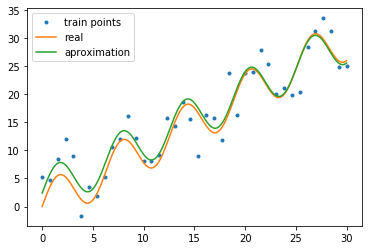

In [11]:
import matplotlib.pyplot as plt

plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, 4*np.sin(x_plot) + x_plot, label='real')

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot)]).T
plt.plot(x_plot, reg.predict(X_plot), label='aproximation')

plt.legend(loc='best')
plt.show()

In [12]:
X_plot

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  3.00030003e-03,  3.00029553e-03],
       [ 1.00000000e+00,  6.00060006e-03,  6.00056405e-03],
       ...,
       [ 1.00000000e+00,  2.99939994e+01, -9.88939432e-01],
       [ 1.00000000e+00,  2.99969997e+01, -9.88489977e-01],
       [ 1.00000000e+00,  3.00000000e+01, -9.88031624e-01]])

In [13]:
reg.coef_

array([2.40304643, 0.90236995, 3.92967158])

Если нужна регуляризация, в sklearn еть регрессоры Ridge (L_2) и Lasso (L_1) (и многое другое: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [14]:
from sklearn.linear_model import Ridge, Lasso

In [15]:
reg = Ridge(alpha=10.0,fit_intercept=False)

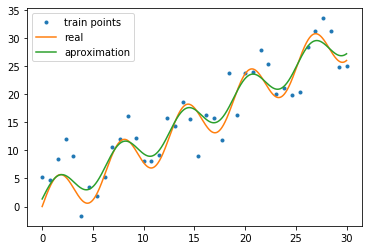

In [16]:
reg.fit(X, Y)
plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, 4*np.sin(x_plot) + x_plot, label='real')

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot)]).T
plt.plot(x_plot, reg.predict(X_plot), label='aproximation')

plt.legend(loc='best')
plt.show()

In [17]:
reg.coef_

array([1.34716055, 0.95145871, 2.67776413])

#### Задача 8

Убедитесь, что аналитическое решение Ridge регрессии совпадает с решением, полученным sklearn. 

#### Решение

In [18]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + np.eye(X.shape[1]) * 10), X.T), Y)

In [19]:
w

array([1.34716055, 0.95145871, 2.67776413])

#### Зачем нужно Lasso?

In [20]:
np.random.seed(0)
l = 40

x = np.linspace(0, 30, num=l)
Y = x + 4*np.sin(x) + 0.1*np.random.randn(l)

X = np.vstack([np.ones_like(x), x, np.sin(x)]).T

#### Добавим признаков!

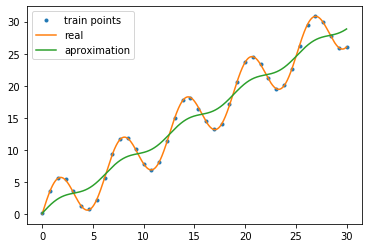

In [21]:
reg = Ridge(alpha=100.0, fit_intercept=False)
X = np.vstack([np.ones_like(x), x, np.sin(x), np.cos(x), np.tanh(x)]).T
reg.fit(X, Y)
plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, 4*np.sin(x_plot) + x_plot, label='real')

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot), np.cos(x_plot), np.tanh(x_plot)]).T
plt.plot(x_plot, reg.predict(X_plot), label='aproximation')

plt.legend(loc='best')
plt.show()

In [22]:
reg.coef_

array([0.09388389, 0.97798728, 0.66450105, 0.0022208 , 0.0818083 ])

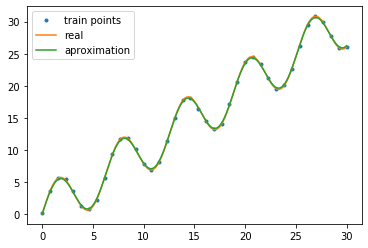

In [23]:
reg = Lasso(alpha=0.1, fit_intercept=False)
X = np.vstack([np.ones_like(x), x, np.sin(x), np.cos(x), np.tanh(x)]).T
reg.fit(X, Y)
plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, 4*np.sin(x_plot) + x_plot, label='real')

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot), np.cos(x_plot), np.tanh(x_plot)]).T
plt.plot(x_plot, reg.predict(X_plot), label='aproximation')

plt.legend(loc='best')
plt.show()

In [24]:
reg.coef_

array([ 0.        ,  1.00002238,  3.80409368, -0.        ,  0.        ])

Lasso регрессия позволяет избавиться от "лишних" признаков:
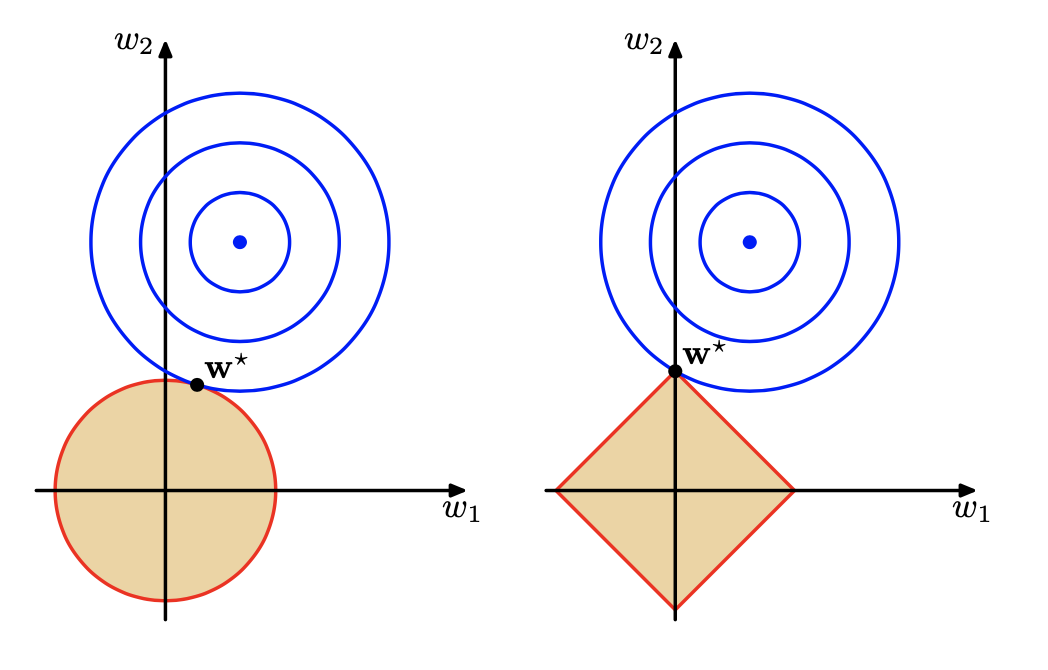

К сожалению, аналитически решить Лассо регрессию не получится.
Значит решаем градиентным спуском (точнее субградиентным, т.к. она местами не диффириенцируема).

$ (Xw - y)^T(Xw - y) + \gamma||w||_1$ 

# Градиентный спуск

#### Задача 9

Покажите, что для любого $\alpha$ существует такая выпуклая функция $f(x)$, что градиентный спуск в котором каждый раз делается шаг на $\alpha \frac {\partial f} {\partial x}$ разойдется.


#### Ответ

В параболе $x^2$ можно перескакивать с ветку на ветку (если встать в точку $0.5$)

#### Решение

Делать шаг на $\alpha_k$, где каждый следующий шаг меньше предыдущего. 

#### Задача 10

Пусть $\alpha_k = \frac{1}{k^2}$. Покажите, что такой метод может сойтись не к оптимуму.


**Ответ**

$\sum \frac{1}{k^2}$ — сходится, если встанем далеко от ноля. Просто «физически» до ноля не дойдем.

Достаточно распространенные варианты: 

$\alpha_k = \frac{1}{k}$,

$\alpha_k = \frac{1}{\sqrt{k}}$,

$\alpha_k = \gamma^{\lfloor \frac {k}{step}\rfloor}$ 

#### Задача 11

Пусть $\alpha_k = \frac{1}{k}$. Может ли такой метод может сойтись не к оптимуму?


**Ответ** 

Нет. Единственное — может сойтесь к локальному минимуму в случае невыпуклой функции.

Один из способова выбрать шаги, которые гарантировано сойдутся: 
метод Хачияна (элипсоидов): https://ru.wikipedia.org/wiki/Метод_эллипсоидов. 

Выбрать эллипс, в котором изначально решение есть и двигаться из его центра по градиенту в центр нового эллипса — тогда область поиска гарантированно уменьшается в константу раз.